<a href="https://colab.research.google.com/github/mdgalvez/Unit-3-Project-3/blob/master/Project_3_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

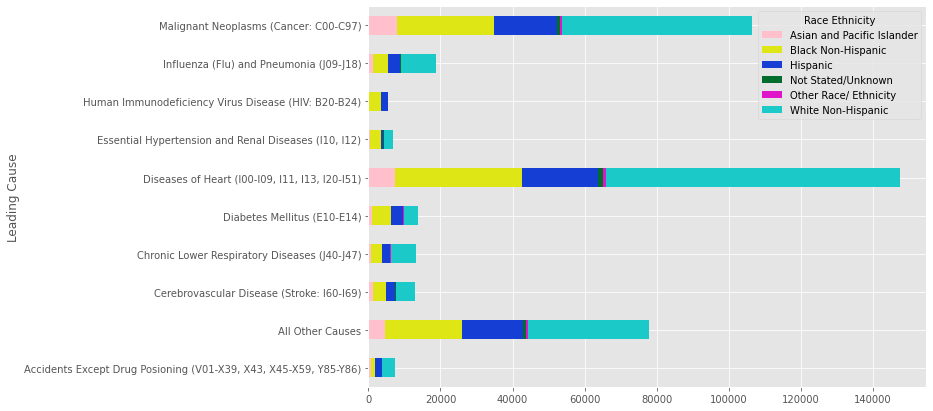

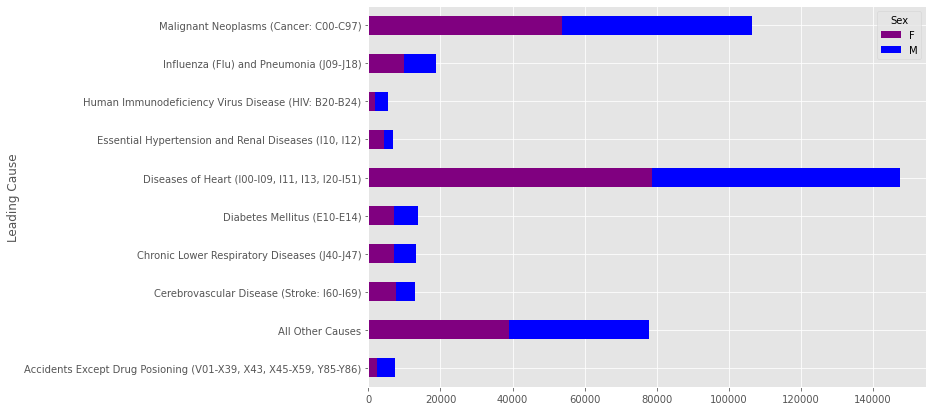

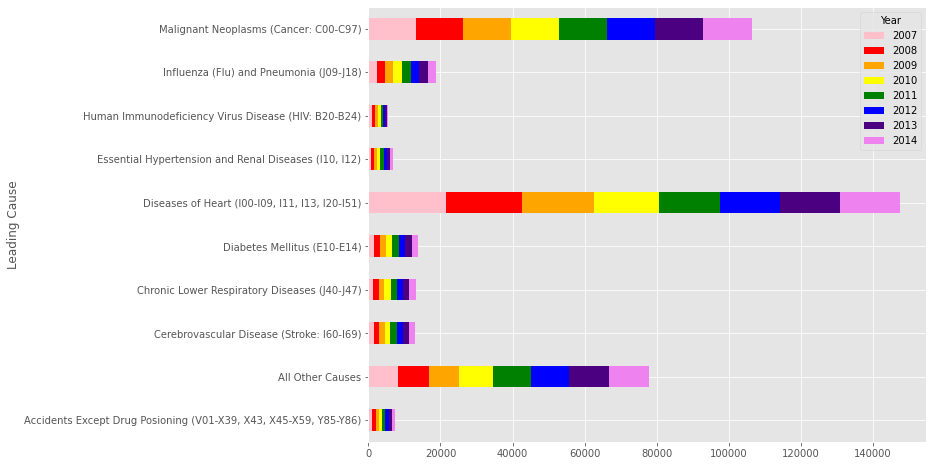

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

mpl.style.use('ggplot')
colors = ["pink","#dfe615","#153ed4","#006D2C", "#e014c9","#1cc9c9"]
colors_sex = ["purple","blue"]
colors_year = ["pink","red", "orange", "yellow", "green","blue", "indigo", "violet"]

#remove missing values
missing_values = [".", ",", "na"]
data = pd.read_csv('https://raw.githubusercontent.com/mdgalvez/Phyton_PROJECT-1/master/New_York_City_Leading_Causes_of_Death%20(2).csv', na_values = missing_values)

#sum all year
df_ethnicity =  pd.DataFrame(data,columns=['Leading Cause','Race Ethnicity','Deaths'])
df_ethnicity_year =  df_ethnicity.groupby(['Leading Cause','Race Ethnicity']).Deaths.sum().reset_index()
df_ethnicity_year["sum_rank"] = df_ethnicity_year.groupby('Leading Cause').Deaths.transform(np.sum).rank(ascending=0,method='dense')

df_pivot = pd.pivot_table(df_ethnicity_year[df_ethnicity_year['sum_rank'] < 11], values = 'Deaths', index=['Leading Cause'], columns = 'Race Ethnicity')
#df_pivot

df_sex =  pd.DataFrame(data,columns=['Leading Cause','Sex','Deaths'])
df_sex_allyear =  df_sex .groupby(['Leading Cause','Sex']).Deaths.sum().reset_index()
df_sex_allyear["sum_rank"] = df_sex_allyear.groupby('Leading Cause').Deaths.transform(np.sum).rank(ascending=0,method='dense')

df_pivot_sex = pd.pivot_table(df_sex_allyear[df_sex_allyear['sum_rank'] < 11], values = 'Deaths', index=['Leading Cause'], columns = 'Sex')
#df_pivot_sex

df_year =  pd.DataFrame(data,columns=['Leading Cause','Year','Deaths'])
df_year_allyear =  df_year .groupby(['Leading Cause','Year']).Deaths.sum().reset_index()
df_year_allyear["sum_rank"] = df_year_allyear.groupby('Leading Cause').Deaths.transform(np.sum).rank(ascending=0,method='dense')

df_pivot_year = pd.pivot_table(df_year_allyear[df_year_allyear['sum_rank'] < 11], values = 'Deaths', index=['Leading Cause'], columns = 'Year')
df_pivot_year

df_pivot.loc[:,['Asian and Pacific Islander','Black Non-Hispanic','Hispanic','Not Stated/Unknown','Other Race/ Ethnicity','White Non-Hispanic']].plot.barh(stacked=True, color=colors, figsize=(10,7))

df_pivot_sex.loc[:,['F','M']].plot.barh(stacked=True, color=colors_sex, figsize=(10,7))

df_pivot_year.loc[:,[2007,2008,2009,2010,2011,2012,2013,2014]].plot.barh(stacked=True, color=colors_year, figsize=(10,8))



 